## Observations and Insights 

In [113]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
from scipy.stats import linregress
from sklearn import datasets
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
Merged_Data = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "inner") 
Merged_Data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice in the DataFrame.
Merged_Data['Mouse ID'].nunique()

249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Merged_Data_dup= Merged_Data.duplicated(['Mouse ID','Timepoint'])
Merged_Data_dup
Duplicate_mouse = Merged_Data.loc[Merged_Data_dup]['Mouse ID'].unique()
Duplicate_mouse

array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
Mask = Merged_Data['Mouse ID']!='g989'
Mask

0       True
1       True
2       True
3       True
4       True
        ... 
1888    True
1889    True
1890    True
1891    True
1892    True
Name: Mouse ID, Length: 1893, dtype: bool

In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Cleaned_data = Merged_Data.loc[Mask]
Cleaned_data 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
Cleaned_data['Mouse ID']

0       k403
1       k403
2       k403
3       k403
4       k403
        ... 
1888    z969
1889    z969
1890    z969
1891    z969
1892    z969
Name: Mouse ID, Length: 1880, dtype: object

In [11]:
# Checking the number of mice in the clean DataFrame.
Merged_Data.loc[Mask]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straightforward, creating multiple series and putting them all together at the end.

Cleaned_data_stat= Cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)']
Cleaned_data_stat
Cleaned_data_stat.mean()
Cleaned_data_stat.median()
Cleaned_data_stat.var()
Cleaned_data_stat.std()
Cleaned_data_stat.sem()

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [16]:
SummaryTable_CleanedData =pd.DataFrame({"Mean ": Cleaned_data_stat.mean(),
                   "Median": Cleaned_data_stat.median(),
                   "Variance": Cleaned_data_stat.var(),
                   "Standard deviation":Cleaned_data_stat.std(),
                   "SEM": Cleaned_data_stat.sem()})
SummaryTable_CleanedData

,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function.

SummaryTable_CleanedData2 = Cleaned_data.groupby('Drug Regimen').agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]

In [19]:
SummaryTable_CleanedData2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

In [22]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

A = Merged_Data.groupby(['Timepoint','Drug Regimen'])['Mouse ID'].count().reset_index()
A['Timepoint']= A['Timepoint'].astype(str).apply(leftpad)
G= A.pivot(index='Timepoint',columns='Drug Regimen',values='Mouse ID')

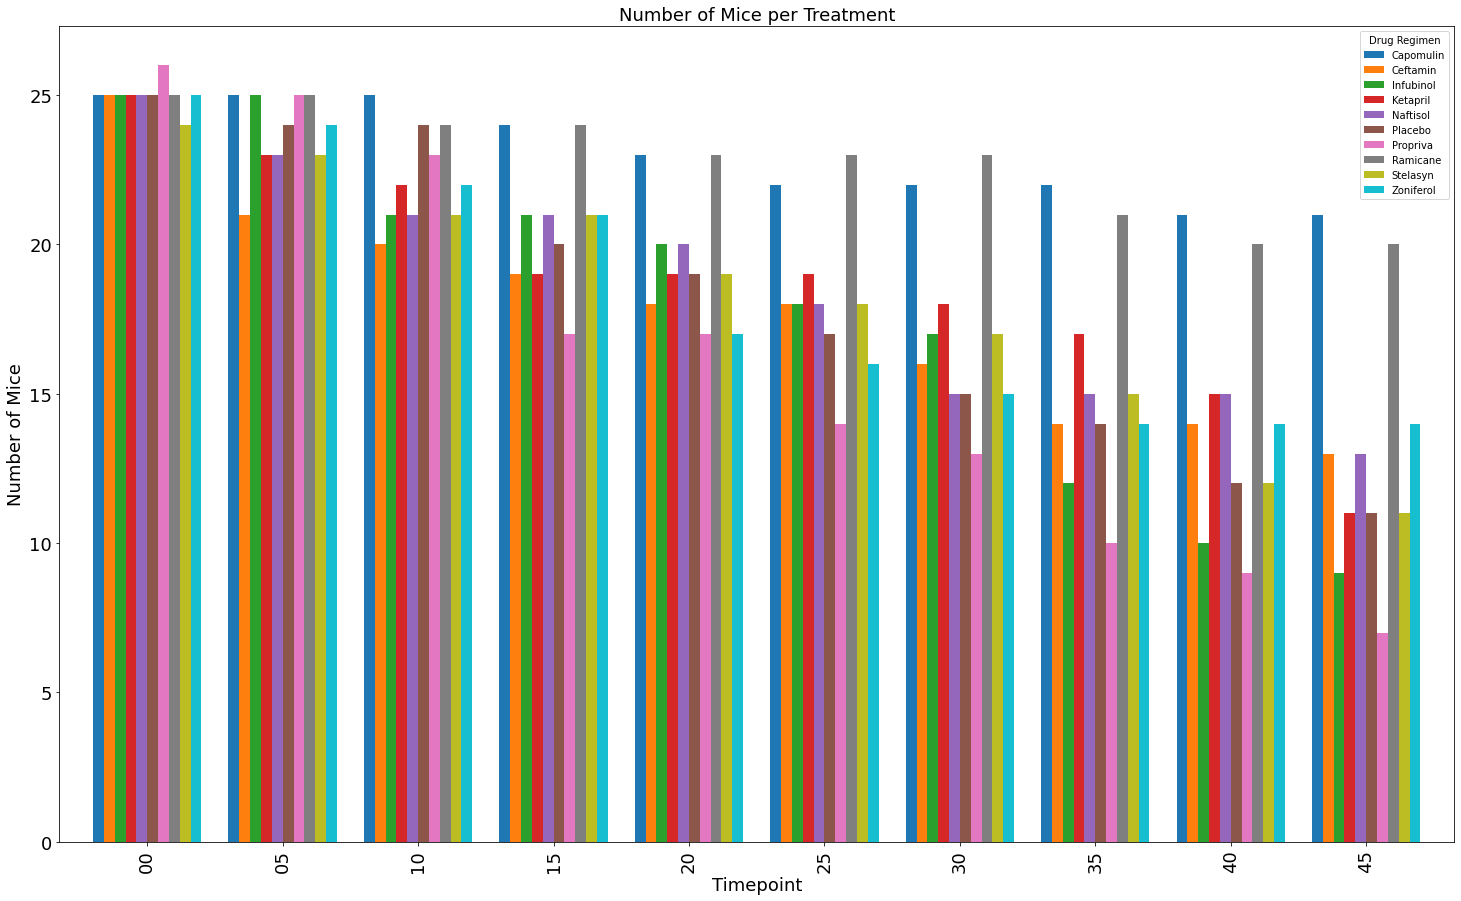

In [123]:
def leftpad(timepoint):
    if len(timepoint) ==1:
        timepoint='0'+timepoint
    return timepoint

G.plot.bar(figsize=(25,15), fontsize = 18, width=0.8)
plt.xlabel("Timepoint",fontsize = 18)
plt.ylabel("Number of Mice",fontsize = 18)
plt.title("Number of Mice per Treatment",fontsize = 18)
plt.savefig("../images/treatmentBar.png", bbox_inches = "tight")
plt.show()

In [24]:
# Generate a bar plot showing the number of total observation across all timepoints for each treatment.
G

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
00,25,25,25,25,25,25,26,25,24,25
05,25,21,25,23,23,24,25,25,23,24
10,25,20,21,22,21,24,23,24,21,22
15,24,19,21,19,21,20,17,24,21,21
20,23,18,20,19,20,19,17,23,19,17
25,22,18,18,19,18,17,14,23,18,16
30,22,16,17,18,15,15,13,23,17,15
35,22,14,12,17,15,14,10,21,15,14
40,21,14,10,15,15,12,9,20,12,14


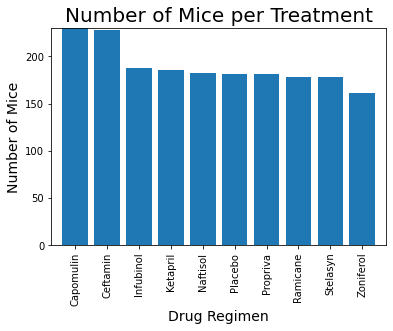

In [124]:
# Generate a bar plot showing the number of total observation across all timepoints for each treatment.
Sorted_G = G.sum().sort_values(ascending=False)
G.sum().sort_values(ascending=False)
x_axis = np.arange(len(Sorted_G))
# #for i in col timepoint:
  
tick_locations = [value for value in x_axis]
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0,max(Sorted_G))         
plt.xticks(tick_locations,['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')
plt.title("Number of Mice per Treatment",fontsize = 20)
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Mice",fontsize = 14)
plt.bar(x=x_axis,height=Sorted_G)
plt.savefig("../images/totalobservationVSAllBar.png", bbox_inches = "tight")
plt.show()

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

## Pie Plots

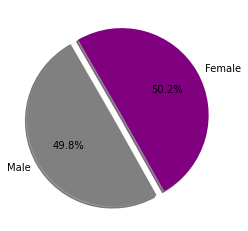

In [125]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sizes = mouse_metadata.groupby(["Sex"]).count()['Mouse ID']
sizes
plt.pie(
     sizes,
     labels=["Male", "Female"],
     explode=[0.1, 0],
     colors=["Grey","Purple"],
     autopct="%1.1f%%",
     shadow=True,
     startangle=120
)
plt.savefig("../images/PieFemaleVsMale.png", bbox_inches = "tight")
plt.show()

Text(0.5, 1.0, 'Male vs Female Mouse Population')

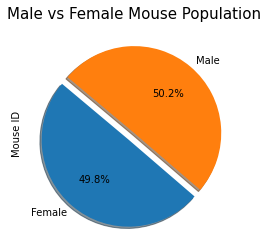

In [126]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plot = sizes.plot.pie(y=sizes,figsize=(15,4),startangle=140, explode = (0.1, 0), shadow = True, autopct="%1.1f%%")
plt.savefig("../images/PieFemaleVsMalePyplot.png", bbox_inches = "tight")
plt.title('Male vs Female Mouse Population',fontsize = 15)

In [34]:
Merged_Data.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

## Quartiles, Outliers and Boxplots

In [35]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
Capomulin_df = Merged_Data.loc[Merged_Data['Drug Regimen'] == 'Capomulin',:]
Capomulin_range = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_volume = pd.DataFrame(Capomulin_range)
Capomulin_merge = pd.merge(Capomulin_volume, Merged_Data, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [54]:
Capomulin_quartiles = Capomulin_merge['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = Capomulin_quartiles[0.25]
upperq = Capomulin_quartiles[0.75]

iqr = upperq - lowerq
iqr

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

lower_bound
upper_bound

print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"Vol below {lower_bound} looks like the outliers.")
print(f"Vol above {upper_bound} looks like the outliers.")

The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
Vol below 20.70456164999999 looks like the outliers.
Vol above 51.83201549 looks like the outliers.


In [36]:
#Ramicane_df
Ramicane_df = Merged_Data.loc[Merged_Data['Drug Regimen'] == 'Ramicane',:]
Ramicane_range = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_volume = pd.DataFrame(Ramicane_range)
Ramicane_merge = pd.merge(Ramicane_volume, Merged_Data, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [56]:
Ramicane_quartiles = Ramicane_merge['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]

iqr = upperq - lowerq
iqr

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

lower_bound
upper_bound
print(f"The lower quartile of Ramicane tumors: {lowerq}")
print(f"The upper quartile of Ramicane tumors: {upperq}")
print(f"The interquartile range of Ramicane tumors: {iqr}")
print(f"Vol below {lower_bound} looks like the outliers.")
print(f"Vol above {upper_bound} looks like the outliers.")

The lower quartile of Ramicane tumors: 48.72207785
The upper quartile of Ramicane tumors: 64.29983003
The interquartile range of Ramicane tumors: 15.577752179999997
Vol below 25.355449580000002 looks like the outliers.
Vol above 87.66645829999999 looks like the outliers.


In [37]:
# For Infubinol_df
Infubinol_df = Merged_Data.loc[Merged_Data['Drug Regimen'] == 'Infubinol',:]
Infubinol_range = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_volume = pd.DataFrame(Infubinol_range)
Infubinol_merge = pd.merge(Infubinol_volume, Merged_Data, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [57]:
Infubinol_quartiles = Infubinol_merge['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]

iqr = upperq - lowerq
iqr

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

lower_bound
upper_bound
print(f"The lower quartile of Infubinol tumors: {lowerq}")
print(f"The upper quartile of Infubinol tumors: {upperq}")
print(f"The interquartile range of Infubinol tumors: {iqr}")
print(f"Vol below {lower_bound} looks like the outliers.")
print(f"Vol above {upper_bound} looks like the outliers.")

The lower quartile of Infubinol tumors: 48.72207785
The upper quartile of Infubinol tumors: 64.29983003
The interquartile range of Infubinol tumors: 15.577752179999997
Vol below 25.355449580000002 looks like the outliers.
Vol above 87.66645829999999 looks like the outliers.


In [38]:
# Ceftamin_df 
Ceftamin_df = Merged_Data.loc[Merged_Data['Drug Regimen'] == 'Ceftamin',:]
Ceftamin_range = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_volume = pd.DataFrame(Ceftamin_range)
Ceftamin_merge = pd.merge(Ceftamin_volume, Merged_Data, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [58]:
Ceftamin_quartiles = Ceftamin_merge['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]

iqr = upperq - lowerq
iqr

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

lower_bound
upper_bound
print(f"The lower quartile of Ceftamin tumors: {lowerq}")
print(f"The upper quartile of Ceftamin tumors: {upperq}")
print(f"The interquartile range of Ceftamin tumors: {iqr}")
print(f"Vol below {lower_bound} looks like the outliers.")
print(f"Vol above {upper_bound} looks like the outliers.")

The lower quartile of Ceftamin tumors: 48.72207785
The upper quartile of Ceftamin tumors: 64.29983003
The interquartile range of Ceftamin tumors: 15.577752179999997
Vol below 25.355449580000002 looks like the outliers.
Vol above 87.66645829999999 looks like the outliers.


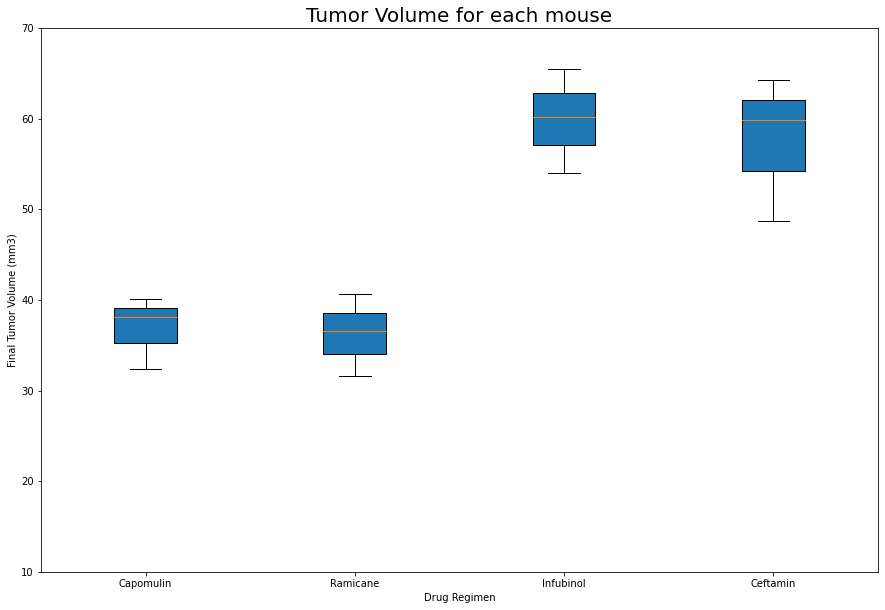

In [127]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plot = [Capomulin_quartiles, Ramicane_quartiles, Infubinol_quartiles, Ceftamin_quartiles]
Regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title('Tumor Volume for each mouse',fontsize =20)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 10)
ax1.set_xlabel('Drug Regimen',fontsize = 10)
ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.3, patch_artist=True,vert=True)

plt.ylim(10, 70)
plt.savefig("../images/BoxPlot.png", bbox_inches = "tight")
plt.show()

## Line and Scatter Plots

In [70]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#g316
Treated_Capomulin_g316 = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "g316",:]
Treated_Capomulin_g316

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
351,g316,Capomulin,Female,22,22,0,45.000000,0
352,g316,Capomulin,Female,22,22,5,44.022752,0
353,g316,Capomulin,Female,22,22,10,44.502042,0
354,g316,Capomulin,Female,22,22,15,45.216743,0
355,g316,Capomulin,Female,22,22,20,45.933322,1
356,g316,Capomulin,Female,22,22,25,46.809225,1
357,g316,Capomulin,Female,22,22,30,44.221480,2
358,g316,Capomulin,Female,22,22,35,44.702833,2
359,g316,Capomulin,Female,22,22,40,45.565821,2
360,g316,Capomulin,Female,22,22,45,40.159220,2


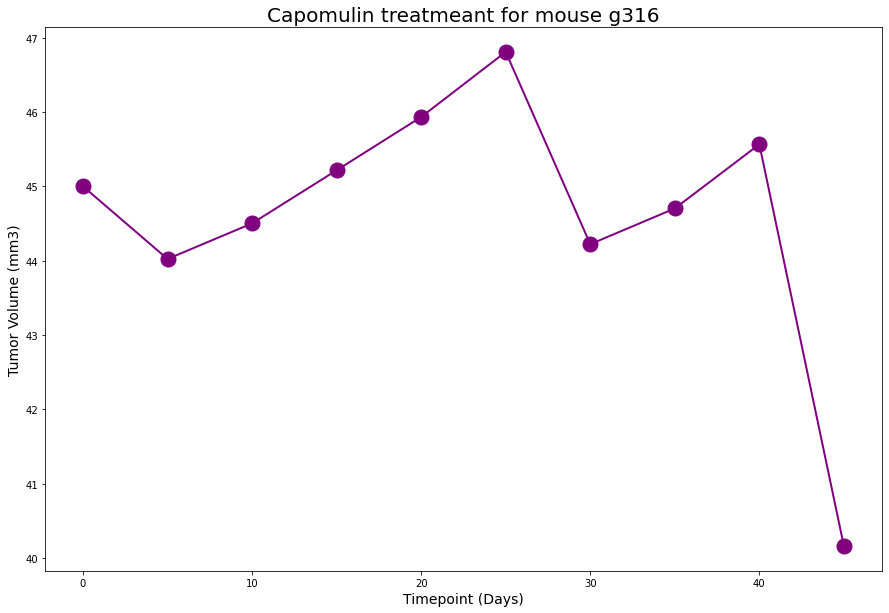

In [128]:
x_axis = Treated_Capomulin_g316["Timepoint"]
size_ofTumor = Treated_Capomulin_g316["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.title('Capomulin treatmeant for mouse g316',fontsize =20)
plt.plot(x_axis, size_ofTumor,linewidth=2, markersize=15,marker="o",color="Purple", label="Fahreneit")
plt.xlabel('Timepoint (Days)',fontsize =14)
plt.ylabel('Tumor Volume (mm3)',fontsize =14)
plt.savefig("../images/LinePlot.png", bbox_inches = "tight")
plt.show()

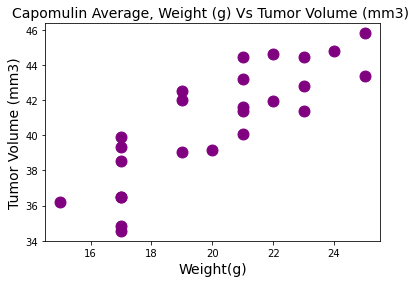

In [129]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
x_axisB = Capomulin_df.groupby('Mouse ID')['Weight (g)'].mean()
x_axisB
Avg_TUmo = Capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
Avg_TUmo
plt.scatter(x_axisB, Avg_TUmo, s=120, c= 'Purple')
plt.title('Capomulin Average, Weight (g) Vs Tumor Volume (mm3) ',fontsize =14)
plt.xlabel('Weight(g)',fontsize =14)
plt.ylabel('Tumor Volume (mm3)',fontsize =14)
plt.savefig("../images/ScatterPlot.png", bbox_inches = "tight")
plt.show()


## Correlation and Regression

In [107]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(x_axisB ,Avg_TUmo)[0],3)
corr

0.842

In [120]:
x_values = x_axisB
y_values = Avg_TUmo

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"Correlation Coefficient :{corr}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

slope:0.9544396890241045
intercept:21.552160532685015
rvalue (Correlation coefficient):0.8419363424694718
Correlation Coefficient :0.842
stderr:0.12754359033201337
y = 0.95x + 21.55


The r-squared is: 0.7088568047708717


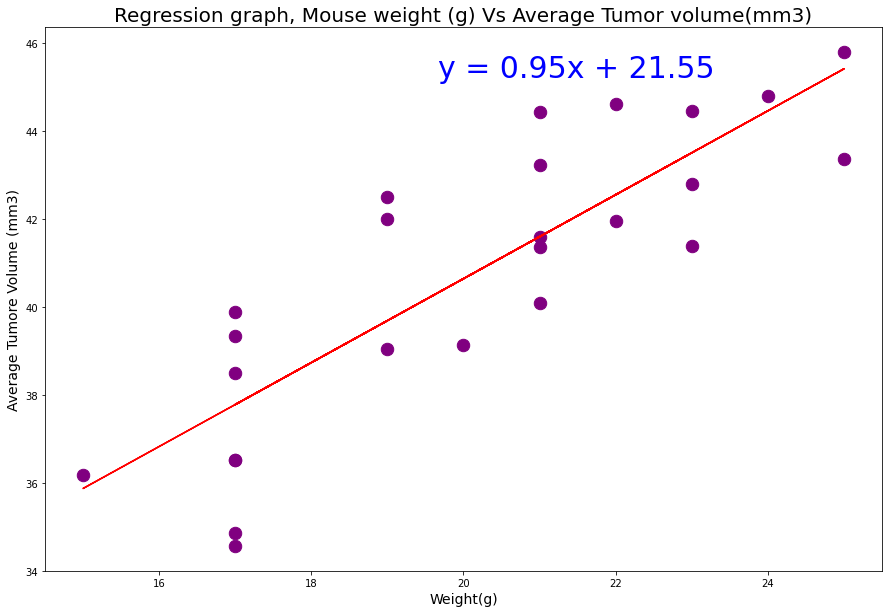

In [131]:
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.scatter(x_values,y_values,s=155, color="Purple")
plt.plot(x_values,regress_values,"r-")
plt.title('Regression graph, Mouse weight (g) Vs Average Tumor volume(mm3)',fontsize =20)
plt.xlabel('Weight(g)',fontsize =14)
plt.ylabel('Average Tumore Volume (mm3)',fontsize =14)
ax1.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=30,color="blue")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("../images/regressionGraph.png", bbox_inches = "tight")
plt.show()